In [1]:
# Dependencies
import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create engine
engine = create_engine("sqlite:///database/hawaii.sqlite")

# Declare Base
Base = automap_base()

# Use Base class to reflect database tables
Base.prepare(engine, reflect=True)

In [3]:
# Check out tables
Base.classes.keys()

['measurements', 'stations']

In [4]:
# Assign measurements class to variable
Measurement = Base.classes.measurements

# Assign stations class to variable
Station = Base.classes.stations

In [5]:
# Create a session
session = Session(engine)

In [6]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

C:\Users\Justin\Anaconda3\envs\PythonData\lib\site-packages\sqlalchemy\sql\sqltypes.py:596: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21c7d552278>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': Decimal('0.0800000000'),
 'station': 'USC00519397',
 'tobs': 65}

In [7]:
# Show top 10 rows of measurement table
session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).limit(10).all()

[(1, 'USC00519397', '2010-01-01', Decimal('0.0800000000'), 65),
 (2, 'USC00519397', '2010-01-02', Decimal('0E-10'), 63),
 (3, 'USC00519397', '2010-01-03', Decimal('0E-10'), 74),
 (4, 'USC00519397', '2010-01-04', Decimal('0E-10'), 76),
 (5, 'USC00519397', '2010-01-07', Decimal('0.0600000000'), 70),
 (6, 'USC00519397', '2010-01-08', Decimal('0E-10'), 64),
 (7, 'USC00519397', '2010-01-09', Decimal('0E-10'), 68),
 (8, 'USC00519397', '2010-01-10', Decimal('0E-10'), 73),
 (9, 'USC00519397', '2010-01-11', Decimal('0.0100000000'), 64),
 (10, 'USC00519397', '2010-01-12', Decimal('0E-10'), 61)]

# Precipitation Analysis

In [8]:
# See latest dates
session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.date.desc()).limit(5).all()

[(2685, 'USC00519397', '2017-08-23', Decimal('0E-10'), 81),
 (7318, 'USC00514830', '2017-08-23', Decimal('0E-10'), 82),
 (10915, 'USC00519523', '2017-08-23', Decimal('0.0800000000'), 82),
 (18103, 'USC00516128', '2017-08-23', Decimal('0.4500000000'), 76),
 (2684, 'USC00519397', '2017-08-22', Decimal('0E-10'), 82)]

In [9]:
# Query date for the past 12 months
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)

2016-08-23


In [10]:
# Query for precipitation for the past 12 months
prcp_data = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= query_date).all()

In [11]:
# Create dataframe from query
prcp_df = pd.DataFrame(prcp_data)

# Change column types
prcp_df["date"] = pd.to_datetime(prcp_df["date"])
prcp_df["prcp"] = pd.to_numeric(prcp_df["prcp"])

# Set date as index
prcp_df = prcp_df.set_index(["date"])
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


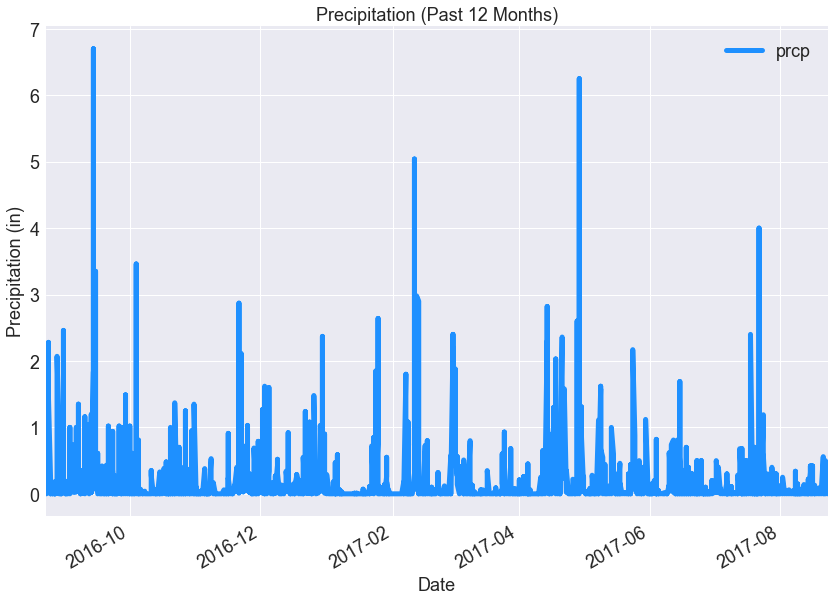

In [12]:
# Seaborn default
ax = sns.set()

# Use DataFrame.plot() in order to create a bar chart of the data
prcp_df.plot(kind="line", color="dodgerblue", linewidth=5, figsize=(14, 10), fontsize=18, ax=ax)

# Set a title for the chart
plt.title("Precipitation (Past 12 Months)", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Precipitation (in)", fontsize=18)
plt.legend(fontsize=18)

# Show
plt.show()

In [13]:
# Summary statistics
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [14]:
# Check out table columns
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21c7d7a36d8>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [15]:
# Show first 5 rows of station table
session.query(Station.id, Station.station, Station.name, Station.longitude, Station.latitude, Station.elevation).\
    limit(5).all()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', -157.8168, 21.2716, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', -157.8015, 21.4234, 14.6),
 (3,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  -157.8374,
  21.5213,
  7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', -157.9751, 21.3934, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', -158.0111, 21.4992, 306.6)]

In [16]:
# Query to calculate the total number of stations
num_stations = session.query(Station.id).count()
print(f"Number of stations: {num_stations}")

Number of stations: 9


In [17]:
# Query to find the most active stations
session.query(Measurement.station, Station.name, func.count(Measurement.id)).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

###### USC00519281, WAIHEE 837.5, HI US has the highest number of observations of 2772.

In [18]:
# Query date for the past 12 months
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query to retrieve the last 12 months of temperature observation data (tobs)
tobs_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
                filter(Measurement.date > query_date).\
                filter(Measurement.station == "USC00519281").all()

# Create tobs datafram
tobs_df = pd.DataFrame(tobs_data)
tobs_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77
1,USC00519281,2016-08-25,80
2,USC00519281,2016-08-26,80
3,USC00519281,2016-08-27,75
4,USC00519281,2016-08-28,73


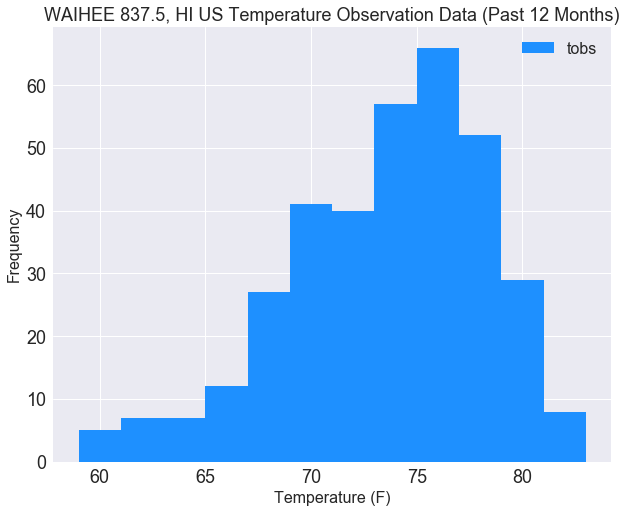

In [19]:
# Seaborn default
ax = sns.set()

# Plot
tobs_df.plot(kind="hist", color="dodgerblue", bins=12, figsize=(10, 8), fontsize=18, ax=ax)

# Labels
plt.title("WAIHEE 837.5, HI US Temperature Observation Data (Past 12 Months)", fontsize=18)
plt.xlabel("Temperature (F)", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.legend(fontsize=16)

# Show plot
plt.show()

# Temperature Analysis

In [41]:
new_start_date = dt.datetime.strptime("2018-01-01", "%Y-%m-%d") - dt.timedelta(days=365)
print(new_start_date)

new_start_date = dt.datetime.strftime(new_start_date, "%Y-%m-%d")
print(new_start_date)

2017-01-01 00:00:00
2017-01-01


In [43]:
def calc_temps(start_date, end_date):
    # Convert dates to datetime objects and use previous year's dates
    new_start_date = dt.datetime.strptime(start_date, "%Y-%m-%d") - dt.timedelta(days=365)
    new_end_date = dt.datetime.strptime(end_date, "%Y-%m-%d") - dt.timedelta(days=365)
    
    # Convert dates back to strings
    new_start_date = dt.datetime.strftime(new_start_date, "%Y-%m-%d")
    new_end_date = dt.datetime.strftime(new_end_date, "%Y-%m-%d")
    
    # Query to filter data for those dates
    temp = session.query(Measurement.tobs).\
                filter(Measurement.date >= new_start_date).\
                filter(Measurement.date < new_end_date).all()
    
    # Convert list of tuples into normal list
    temp = list(np.ravel(temp))
    
    # Calculate minimum temperature
    min_temp = min(temp)
    
    # Calculate average temperature
    avg_temp = np.mean(temp)
    
    # Calculate maximum temperature
    max_temp = max(temp)
    
    return min_temp, avg_temp, max_temp

In [44]:
# Get min, avg, and max temp for date range
min_temp, avg_temp, max_temp = calc_temps("2018-04-14", "2018-04-22")

# Print to console
print("Trip Temperature Range")
print("-"*12)
print(f"Minimum temp: {min_temp}")
print(f"Average temp: {avg_temp:.1f}")
print(f"Maximum temp: {max_temp}")

Trip Temperature Range
------------
Minimum temp: 67
Average temp: 72.7
Maximum temp: 83


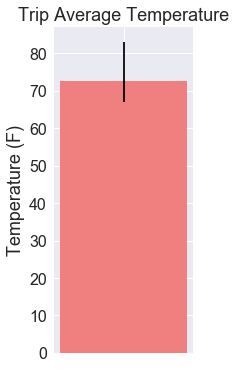

In [45]:
# Set figure size
plt.figure(figsize=(2.5,6))

# Calculate tmin and tmax of yerr
yerr_min = abs(avg_temp - min_temp)
yerr_max = abs(avg_temp - max_temp)

# Create bar plot
plt.bar("", avg_temp, yerr=([yerr_min], [yerr_max]), color="lightcoral")

# 
plt.tick_params(axis='y', which='major', labelsize=16)

# Labels
plt.title("Trip Average Temperature", fontsize=18)
plt.ylabel("Temperature (F)", fontsize=18)

# Show plot
plt.show()

# Rainfall Analysis

In [52]:
# Query date for the past 12 months
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Calcualte the rainfall per weather station using the previous year's matching dates
precip_data = session.query(Station.name, func.sum(Measurement.prcp)).\
                filter(Measurement.station == Station.station).\
                filter(Measurement.date >= query_date).\
                group_by(Station.name).\
                order_by(func.sum(Measurement.prcp).desc()).all()

# Create dataframe
precip_df = pd.DataFrame(precip_data, columns=['Station Name', 'Total Precipitation (Past 12 Months)'])
precip_df.head()

,Station Name,Total Precipitation (Past 12 Months)
0,"MANOA LYON ARBO 785.2, HI US",147.8100000000
1,"WAIHEE 837.5, HI US",70.0300000000
2,"KANEOHE 838.1, HI US",48.5100000000
3,"WAIMANALO EXPERIMENTAL FARM, HI US",38.0100000000
4,"KUALOA RANCH HEADQUARTERS 886.9, HI US",33.2400000000


In [80]:
def daily_normals(a_date):
    """
    Grab min, avg, max temperatures for historic dates.
    """
    
    # Query to grab all historic temperatures by date
    temps = session.query(Measurement.tobs).\
                filter(Measurement.date.like(f"%{a_date}")).all()
    
    # Convert list of tuples into normal list
    temps = list(np.ravel(temps))
    
    # Calculate min, avg, and max temps
    min_temp = min(temps)
    avg_temp = np.mean(temps)
    max_temp = max(temps)
    
    return min_temp, avg_temp, max_temp

In [112]:
daily_normals("8-23")

(67, 76.755102040816325, 87)

In [113]:
def calc_trip_temps(start_date, end_date):
    """
    Grab min, avg, max temperatures for trip dates.
    """
    # Calculate trip duration
    trip_duration =  (dt.datetime.strptime("2018-04-22", "%Y-%m-%d") - dt.datetime.strptime("2018-04-14", "%Y-%m-%d")).days
    
    # Instantiate trip_datetime
    trip_datetime = dt.datetime.strptime(start_date, "%Y-%m-%d")
    
    # List to hold all dates for trip, start with start date
    trip_date_list = [f"{trip_datetime.month}-{trip_datetime.day}"]
    
    for day in range(trip_duration):
        
        # Convert date to datetime, add one day
        trip_datetime += dt.timedelta(days=1)
        
        
        month_day = f"{trip_datetime.month}-{trip_datetime.day}"
        
        print(month_day)
        
        # Convert datetime back to string
        trip_date = dt.datetime.strftime(trip_datetime, "%Y-%m-%d")
        
        # Append trip date to list of trip dates
        trip_date_list.append(month_day)
        
    
    return trip_date_list

In [97]:
trip_duration =  (dt.datetime.strptime("2018-04-22", "%Y-%m-%d") - dt.datetime.strptime("2018-04-14", "%Y-%m-%d")).days
# trip_duration = trip_duration.days
print(trip_duration)

8


In [110]:
calc_trip_temps("2018-04-14", "2018-04-22")

4-15
4-16
4-17
4-18
4-19
4-20
4-21
4-22


['2018-04-14',
 '2018-04-15',
 '2018-04-16',
 '2018-04-17',
 '2018-04-18',
 '2018-04-19',
 '2018-04-20',
 '2018-04-21',
 '2018-04-22']